# <p style="padding:10px;background-color:#d64161 ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Assignment  68: Ensemble Techniques 4 - Abhishek Waghcahure</p>

## Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link : https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

## Queston 1 : Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary
---

### Step 1 - Read the dataset and check basic information

In [63]:
import pandas as pd
df = pd.read_csv('Dataset/dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
df.shape

(303, 14)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Step 2 - Check Missing Values

In [66]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Step 3 - Data Description

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [68]:
df.nunique().sort_values(ascending=True)

sex           2
fbs           2
exang         2
target        2
restecg       3
slope         3
cp            4
thal          4
ca            5
oldpeak      40
age          41
trestbps     49
thalach      91
chol        152
dtype: int64

### Step 5 Seperating dependent and independent features

In [69]:
X = df.drop(['target'],axis = 1)
y = df['target']

In [70]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [71]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [72]:
X.shape

(303, 13)

In [73]:
y.value_counts()

target
1    165
0    138
Name: count, dtype: int64

## Question 2 : Split the dataset into a training set (70%) and a test set (30%).
---

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70, random_state=42)

In [76]:
X_train.shape

(212, 13)

In [77]:
X_test.shape

(91, 13)

## Question 3 : Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

----

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
random_forest_classifier = RandomForestClassifier(n_estimators=100,max_depth=10)

In [80]:
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

## Question 4 : Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score

---

In [81]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [84]:
def evaluate_model(X_test,y_test,model):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall =recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    print('Accuracy score :',accuracy)
    print('precision_score :',precision)
    print('Recall score :', recall)
    print('F1 score :',f1)
    
    return accuracy_score,precision_score,recall_score,f1_score

In [123]:
acc, pre, rec, f1 = evaluate_model(X_test, y_test, random_forest_classifier)

Accuracy score : 0.8021978021978022
precision_score : 0.82
Recall score : 0.82
F1 score : 0.82


In [86]:
from sklearn.metrics import classification_report

In [90]:
y_pred_test =random_forest_classifier.predict(X_test)
report = classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [95]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

In [94]:
cf = confusion_matrix(y_test, y_pred_test)
cf

array([[32,  9],
       [ 9, 41]])

<Axes: >

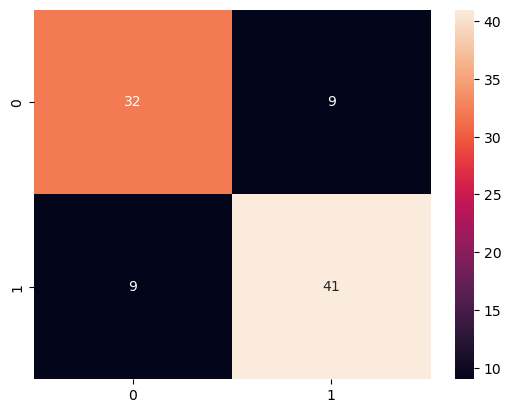

In [96]:
heatmap(cf, annot=True)

## Question 5 : Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

In [100]:
random_forest_classifier.feature_importances_

array([0.08667363, 0.03127869, 0.12087432, 0.06729672, 0.07082395,
       0.01261695, 0.01780771, 0.1226819 , 0.06573336, 0.09988683,
       0.05249047, 0.13789021, 0.11394525])

In [101]:
random_forest_classifier.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [103]:
imp = pd.Series(random_forest_classifier.feature_importances_)
imp.index = random_forest_classifier.feature_names_in_
imp = imp.sort_values(ascending=False)
imp

ca          0.137890
thalach     0.122682
cp          0.120874
thal        0.113945
oldpeak     0.099887
age         0.086674
chol        0.070824
trestbps    0.067297
exang       0.065733
slope       0.052490
sex         0.031279
restecg     0.017808
fbs         0.012617
dtype: float64

In [104]:
type(imp)

pandas.core.series.Series

In [106]:
top5 = imp[:5].index
top5

Index(['ca', 'thalach', 'cp', 'thal', 'oldpeak'], dtype='object')

<Axes: title={'center': 'feature importances plot'}>

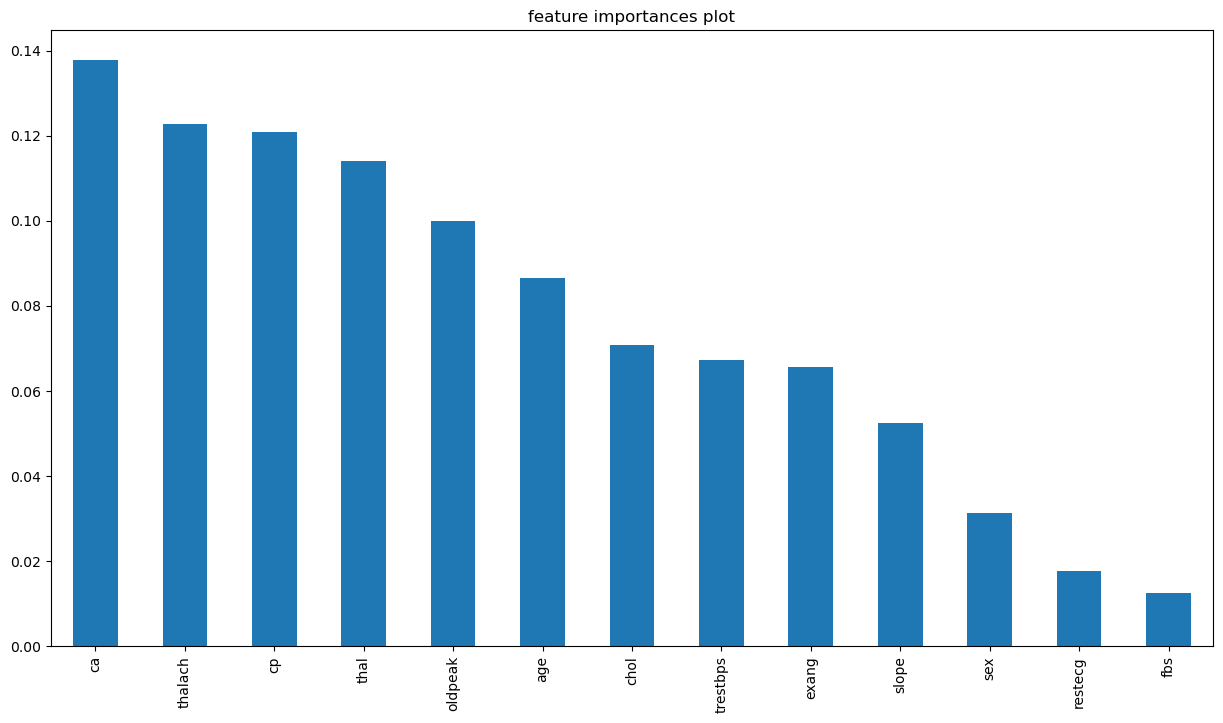

In [109]:
imp.plot(kind='bar', title = 'feature importances plot', figsize=(15,8))

## Question 6 : Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.



In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
parameters = {
    'n_estimators':[10,50,100,200,300,400],
    'max_depth':[4,5,6,7,8,9,10],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[2,5,10]
}

In [114]:
gcv = GridSearchCV(random_forest_classifier, param_grid=parameters, cv =5, scoring = 'f1', verbose=3)

In [115]:
gcv.fit(X_train,y_train)

Fitting 5 folds for each of 630 candidates, totalling 3150 fits
[CV 1/5] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.909 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.826 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.745 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.875 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.826 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.857 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.784 total time=   0.0s
[CV 4/5]

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200, 300, 400]},
             scoring='f1', verbose=3)

In [116]:
gcv.best_score_

0.8672840203274987

In [117]:
gcv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

## Question 7 : Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [121]:
gcv.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=50)

In [122]:
print('Results for Tuned Model :\n')
acc_tuned, pre_tuned , rec_tuned, f1_tuned = evaluate_model(X_test,y_test,gcv)


Results for Tuned Model :

Accuracy score : 0.8241758241758241
precision_score : 0.84
Recall score : 0.84
F1 score : 0.8399999999999999


In [124]:
acc, pre, rec, f1 = evaluate_model(X_test, y_test, random_forest_classifier)

Accuracy score : 0.8021978021978022
precision_score : 0.82
Recall score : 0.82
F1 score : 0.82


In [125]:
comparison = {
    'metrics':['accuracy','precision','recall','f1'],
    'base model':[acc,pre,rec,f1],
    'tuned model':[acc_tuned,pre_tuned,rec_tuned,f1_tuned]
}

In [127]:
df_compare = pd.DataFrame(comparison)
df_compare

,metrics,base model,tuned model
0,accuracy,<function accuracy_score at 0x135a47e20>,<function accuracy_score at 0x135a47e20>
1,precision,<function precision_score at 0x135a745e0>,<function precision_score at 0x135a745e0>
2,recall,<function recall_score at 0x135a74670>,<function recall_score at 0x135a74670>
3,f1,<function f1_score at 0x135a741f0>,<function f1_score at 0x135a741f0>
